<a href="https://colab.research.google.com/github/murilo-henrique060/matematica-computacional/blob/main/Atividade2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import math
import time

# Análise dos métodos de aproximação de zero reais de funções

Para analisar o desempenho dos algoritmos uma classe `Metrics` foi criada.

In [ ]:
class Metrics:
  def __init__(self, initial_data, function, real):
    self.initial_data = initial_data
    self.function = function
    self.real = real

    self.start_time = time.perf_counter_ns()
    self.operations = 0
    self.complexity = 0
    self.decisions = 0
    self.avaliations = 0

    self.iterations = 0
    self.is_iteration = False

    self.iteration_time_sum = 0
    self.iteration_operations_sum = 0
    self.iteration_complexity_sum = 0
    self.iteration_decisions_sum = 0
    self.iteration_avaliations_sum = 0


  def operation(self, complexity=1):
    self.operations += 1
    self.complexity += complexity

    if self.is_iteration:
      self.iteration_operations_sum += 1
      self.iteration_complexity_sum += complexity

  def decision(self, complexity=1):
    self.decisions += 1

    if self.is_iteration:
      self.iteration_decisions_sum += 1

    return self.operation(complexity)

  def avaliation(self, complexity=0, quantity=1):
    self.avaliations += quantity

    if self.is_iteration:
      self.iteration_avaliations_sum += quantity

    return self.operation(complexity)

  def start_iteration(self):
    if self.is_iteration:
      self.stop_iteration()

    self.iterations += 1
    self.iteration_start_time = time.perf_counter_ns()
    self.is_iteration = True

  def stop_iteration(self):
    self.iteration_time_sum += time.perf_counter_ns() - self.iteration_start_time
    self.is_iteration = False

  def report(self, x):
    if self.is_iteration:
      self.stop_iteration()

    return {
        'Initial Data': self.initial_data,
        'x': x if x is not None else 'Err',
        'f(x)': f"{self.function(x):.4e}" if x is not None else '-',
        'Error in x': f"{abs(x - self.real):.4e}" if x is not None else '-',
        'Total Time (ns)': time.perf_counter_ns() - self.start_time,
        'Operations': self.operations,
        'Complexity': self.complexity,
        'Decisions': self.decisions,
        'Functions': self.avaliations,
        'Iterations': self.iterations,
        'Iteration Time (ns)': f"{self.iteration_time_sum / self.iterations:.1f}" if self.iterations else 0,
        'Iteration Operations': f"{self.iteration_operations_sum / self.iterations:.1f}" if self.iterations else 0,
        'Iteration Complexity': f"{self.iteration_complexity_sum / self.iterations:.1f}" if self.iterations else 0,
        'Iteration Decisions': f"{self.iteration_decisions_sum / self.iterations:.1f}" if self.iterations else 0,
        'Iteration Functions': f"{self.iteration_avaliations_sum / self.iterations:.1f}" if self.iterations else 0
    }

# Método da Bissecção

O método da bissecção se inicia com um intervalo definido por $a$ e $b$, onde $f(a)f(b) < 0$, ou seja f(a) e f(b) possuam sinais diferentes.

Após isso é encontrado o ponto $x$, definido pela média entre a e b, e se calcula $f(x)$.

Caso $f(x)f(a) > 0$, ($f(x)$ e $f(a)$ tenham o mesmo sinal), $a$ é atualizado para o valor de $x$.

Caso contrário, $b$ é atualizado para o valor de $x$.

O processo é repetido até que se encontre um intervalo dentro do parâmetro ϵ definido.

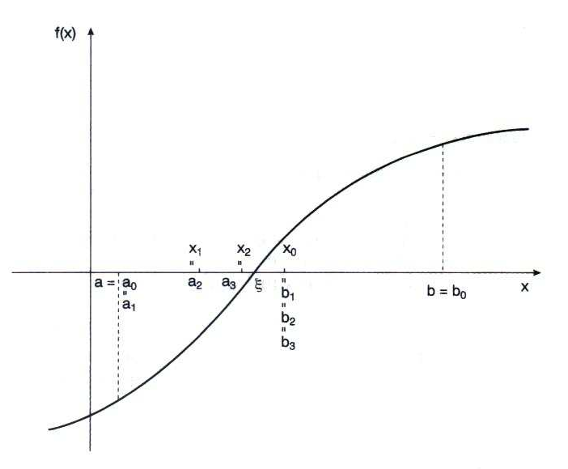

In [ ]:
def bisseccao(funcao, intervalo, e, real):
  m = Metrics(intervalo, funcao, real)

  # 1) Dados iniciais
  m.operation()
  a, b = intervalo

  # 2) Se (b - a) < e, então escolha para x̄ qualquer valor x E [a,b], FIM.
  m.decision()
  if (b - a) < e:
    return m.report(x)

  # 3) k = 1
  m.operation()
  k = 1

  # 4) M = f(a)
  m.avaliation()
  M = funcao(a)

  while True:
    m.start_iteration()

    # 5) x = (a + b) / 2
    m.operation(complexity=3)
    x = (a + b) / 2

    # 6) Se Mf(x) > 0 faca a = x, vá para o passo 8
    m.decision(complexity=3)
    m.avaliation()
    if M * funcao(x) > 0:
      a = x
    # 7) b = x
    else:
      b = x

    # 8) Se (b - a) < e, então escolha para x̄ qualquer valor x E [a,b], FIM.
    m.decision(complexity=2)
    if (b - a) < e:
      return m.report(x)

    # 9) k = k + 1, volte ao passo 5
    m.operation(complexity=2)
    k = k + 1


# Método da posição falsa

O método da posição falsa se assemelha ao método da bissecção, a diferenca sendo no método de cálculo de $x$.

No método da bisseção $x$ é a média entre $a$ e $b$.

$$
x = \frac{(a + b)}{2}
$$

Já no método da posição falsa $x$ é a média ponderada entre $a$ e $b$ com pesos $|f(b)|$ e $|f(a)|$, respectivamente:

$$
x = \frac{a|f(b)| + b|f(a)|}{|f(b)| + |f(a)|} = \frac{af(b) - bf(a)}{f(b) - f(a)}
$$

Graficamente, é representado pela interseção entre o eixo $x$ e a reta formada pelos pontos $(a, f(a))$ e $(b, f(b))$

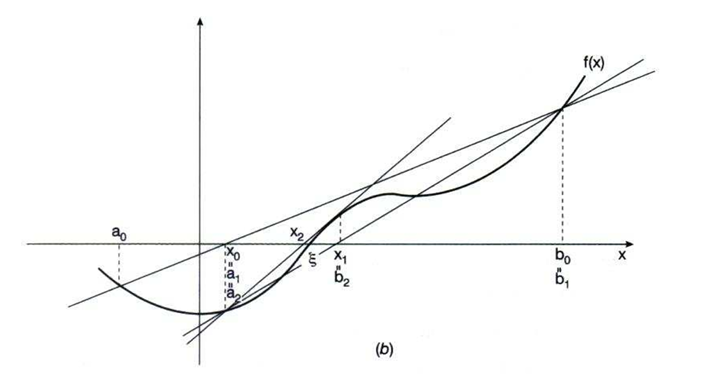

In [ ]:
def posicao_falsa(funcao, intervalo, e, real):
  m = Metrics(intervalo, funcao, real)

  # 1) Dados Iniciais
  m.operation()
  a, b = intervalo

  # 2) Se (b - a) < e1, então escolha para x̄ qualquer valor x E [a,b], FIM.
  m.decision(complexity=2)
  if (b - a) < e:
    return m.report(b);

  # Se |f(a)| < e2 ou se |f(b)| < e2, escolha a ou b como x̄
  m.decision(complexity=2)
  m.avaliation()
  if abs(funcao(a)) < e:
    return m.report(a);

  m.decision(complexity=2)
  m.avaliation()
  if abs(funcao(b)) < e:
    return m.report(b);

  # 3) k = 1
  m.operation()
  k = 1

  # 4) M = f(a)
  m.avaliation()
  M = funcao(a)

  while True:
    m.start_iteration()

    # 5) x = (af(b) - bf(a)) / (f(b) - f(a))
    m.avaliation(complexity=5, quantity=4)
    x = (a * funcao(b) - b * funcao(a)) / (funcao(b) - funcao(a))

    # 6) Se |f(x)| < e2, escolha x̄ = x, FIM
    m.decision(complexity=2)
    m.avaliation()
    if abs(funcao(x)) < e:
      return m.report(x)

    # 7) Se Mf(x) > 0, faca a = x, vá para o passo 9
    m.decision(complexity=3)
    m.avaliation()
    if M * funcao(x) > 0:
      a = x

    # 8) b = x
    else:
      b = x

    # 9) Se b - a < e1, então escolha para x̄ qualquer x E (a, b). FIM.
    m.decision(complexity=2)
    if b - a < e:
      return m.report(b)

    # 10) k = k + 1, volte ao passo 5
    m.operation(complexity=2)
    k = k + 1

# Método do Ponto Fixo

O método do ponto fixo é utilizado para encontrar raízes de uma equação $f(x)=0$, reescrevendo-a na forma:

$$
x=Φ(x)
$$

Onde a raiz de f é definida pela interseção entre $x$ e $Φ(x)$

A partir de um valor inicial $x0$, define-se o processo iterativo:

$$
x_{k+1}=g(x_k)
$$

Se a sequência convergir, seu limite é a raiz da equação.

Graficamente, o método é representado pela interseção das curvas $y=Φ(x)$ e $y=x$, e o processo de iteração é representado pela projeção de Φ(x) em x=y, e sua avaliação novamente.

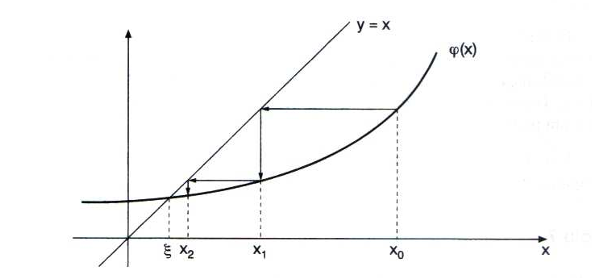

In [ ]:
def ponto_fixo(funcao, phi, x, e, real):
  m = Metrics(f'x0 = {x}', funcao, real)

  # 1) Dados Iniciais
  m.operation()
  x0 = x

  # 2) Se |f(x0)| < ε1, faça x̄ = x0. FIM.
  m.decision(complexity=2)
  m.avaliation()
  if abs(funcao(x0)) < e:
    return m.report(x0)

  # 3) k = 1
  m.operation()
  k = 1

  while True:
    m.start_iteration()

    # 4) x1 = φ(x0)
    m.avaliation()
    x1 = phi(x0)

    # 5) Se |f(x1)| < ε1 ou se |x1 − x0| < ε2, então faça x̄ = x1. FIM.
    m.decision(complexity=6)
    m.avaliation()
    if abs(funcao(x1)) < e or abs(x1 - x0) < e:
      return m.report(x1)

    # 6) x0 = x1
    m.operation()
    x0 = x1

    # 7) k = k + 1, volte ao passo 4
    m.operation(complexity=2)
    k = k + 1


# Método de Newton–Raphson

O método de Newton–Raphson é utilizado para encontrar raízes de uma equação $f(x)=0$ por meio de aproximações sucessivas, utilizando a derivada da função.

A partir de um valor inicial $x_0$, o método constrói uma sequência definida por:

$$
x_{k+1}=x_k-\frac{f(x_k)}{f'(x_k)}
$$

Cada iteração corresponde à interseção do eixo $x$ com a reta tangente ao gráfico de $f(x)$ no ponto $(x_k,f(x_k))$.

Se a sequência convergir, seu limite é a raiz da equação.

Graficamente, o método é representado pela aproximação da raiz através das tangentes sucessivas à curva $y=f(x)$, partindo do ponto inicial até a interseção com o eixo $x$.


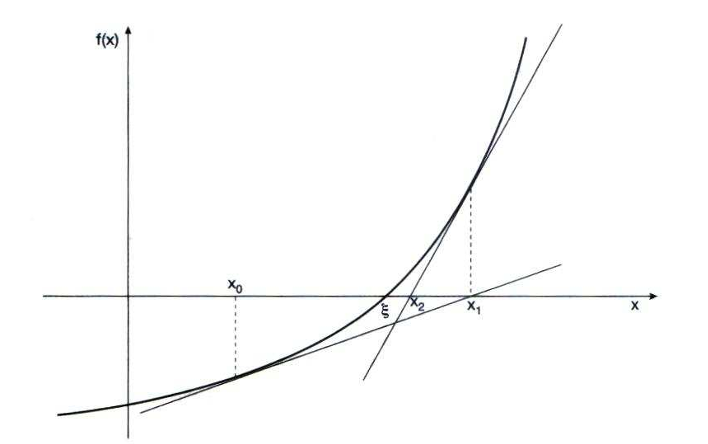

In [ ]:
def newton_raphson(funcao, deriv, x, e, real):
  m = Metrics(f'x0 = {x}', funcao, real)

  # 1) Dados iniciais
  m.operation()
  x0 = x

  # 2) Se |f(x0)| < ε1, faça x̄ = x0. FIM.
  m.decision(complexity=2)
  m.avaliation()
  if abs(funcao(x0)) < e:
    return m.report(x0)

  # 3) k = 1
  m.operation()
  k = 1

  while True:
    m.start_iteration()

    # 4) x1 = x0 − f(x0) / f'(x0)
    m.avaliation(quantity=2, complexity=3)
    x1 = x0 - funcao(x0) / deriv(x0)

    # 5) Se |f(x1)| < ε1 ou se |x1 − x0| < ε2, então faça x̄ = x1. FIM.
    m.decision(complexity=5)
    m.avaliation()
    if abs(funcao(x1)) < e or abs(x1 - x0) < e:
      return m.report(x1)

    # 6) x0 = x1
    m.operation()
    x0 = x1

    # 7) k = k + 1, Volte ao passo 4.
    m.operation()
    k = k + 1


# Método da Secante

O método da secante é utilizado para encontrar raízes de uma equação $f(x) = 0$ a partir de duas aproximações iniciais, sem a necessidade do cálculo da derivada.

Dados dois valores iniciais $x_0$ e $x_1$, constrói-se uma sequência iterativa definida por:

$$
x_{k+1}
= x_k - \frac{f(x_k)\,(x_k - x_{k-1})}{f(x_k) - f(x_{k-1})}
$$

Cada iteração corresponde à interseção do eixo $x$ com a reta secante ao gráfico de $f(x)$, formada pelos pontos  
$(x_{k-1}, f(x_{k-1}))$ e $(x_k, f(x_k))$.

Se a sequência convergir, seu limite é a raiz da equação.

Graficamente, o método é representado por secantes sucessivas à curva $y = f(x)$, que aproximam a raiz sem o uso de derivadas.


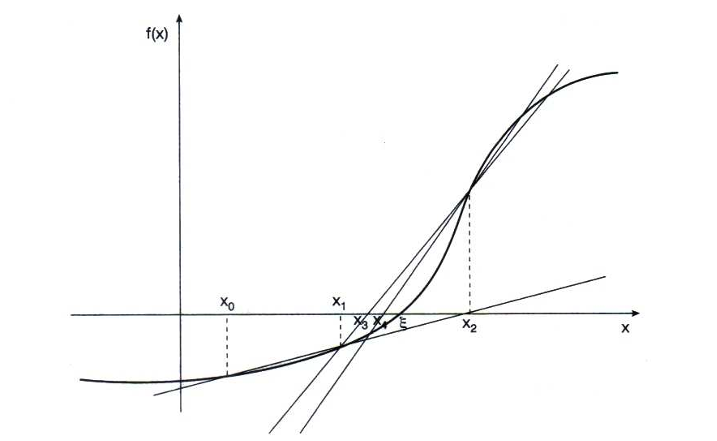

In [ ]:
def newton_raphson(funcao, deriv, x, e, real):
    m = Metrics(f'x0 = {x}', funcao, real)

    # Passo 1: Escolher a aproximação inicial x0 e a tolerância e.
    m.operation()
    x0 = x

    # Passo 2: Se |f(x0)| < e, então x_barra = x0. Fim.
    m.decision(complexity=2)
    m.avaliation()
    if abs(funcao(x0)) < e:
        return m.report(x0)

    # Passo 3: k = 1
    m.operation()
    k = 1

    while True:
        m.start_iteration()

        # Passo 4: x1 = x0 - f(x0) / f'(x0)
        m.avaliation(quantity=2, complexity=3)
        x1 = x0 - funcao(x0) / deriv(x0)

        # Passo 5: Se |f(x1)| < e ou |x1 - x0| < e, então x_barra = x1. Fim.
        m.decision(complexity=5)
        m.avaliation()
        if abs(funcao(x1)) < e or abs(x1 - x0) < e:
            return m.report(x1)

        # Passo 6: x0 = x1
        m.operation()
        x0 = x1

        # Passo 7: k = k + 1. Retornar ao passo 4.
        m.operation()
        k = k + 1

In [ ]:
def comparar_testes(testes: dict):
  algoritmos = { nome: teste[0](*teste[1:]) for nome, teste in testes.items() }

  pd.set_option('display.width', 1000)
  df = pd.DataFrame.from_dict(algoritmos, orient='columns')

  styled_df = df.style.set_table_styles([{
      'selector': 'th',
      'props': [
          ('background-color', '#282a2c'),
          ('color', 'white')]
  }, {
      'selector': '.col_heading, td',
      'props': [
          ('text-align', 'center')
      ]
  }, {
      'selector': '.row_heading',
      'props': [
          ('text-align', 'left')
      ]
  }])

  return styled_df

In [ ]:
def comparar_approx(funcao, deriv, phi, intervalo, mpf_inicial, newton_inicial, secante_inicial, e, real):
  return comparar_testes({
      "Bissecção": (bisseccao, funcao, intervalo, e, real),
      "Posição Falsa": (posicao_falsa, funcao, intervalo, e, real),
      "MPF": (metodo_ponto_fixo, funcao, phi, mpf_inicial, e, real),
      "Newton Raphson": (newton_raphson, funcao, deriv, newton_inicial, e, real),
      "Secante": (secante, funcao, secante_inicial[0], secante_inicial[1], e, real)
  })


# Exemplo 18

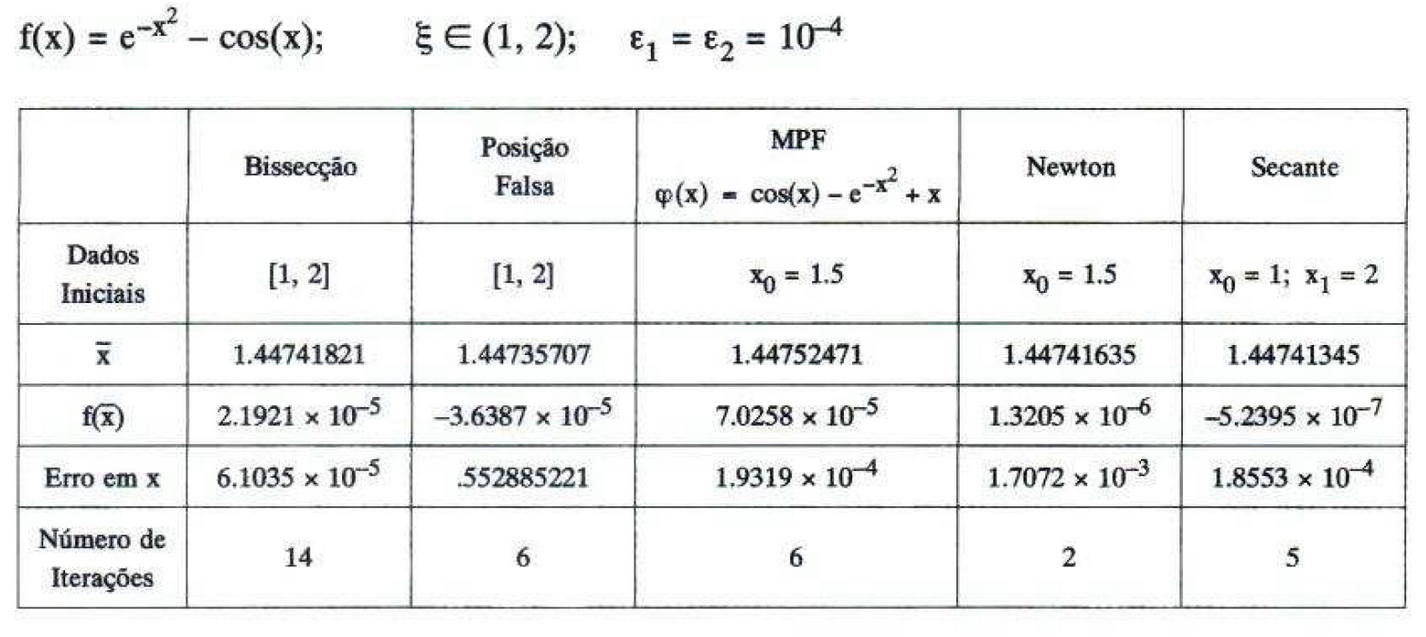

A análise comparativa entre os métodos do exemplo 18 mostra que a eficiência para encontrar a raiz da função varia bastante conforme a técnica escolhida. O método de Newton-Raphson foi o mais veloz, apresentando o menor tempo total de execução, com 13839 ns, e exigindo apenas 2 iterações para convergir. Embora cada iteração individual seja mais custosa em processamento devido ao cálculo da derivada, sua convergência acelerada resulta em uma complexidade total muito inferior aos demais métodos.

Já o método da Bisseção foi o mais lento e custoso, demandando 76283 ns no total. Esse desempenho inferior é reflexo direto de sua convergência linear, que exigiu 14 iterações para atingir a precisão desejada. Além do tempo elevado, a Bisseção apresenta a maior carga de decisões lógicas e complexidade acumulada, o que confirma que sua robustez e simplicidade resultam em baixa eficiência computacional quando comparada a métodos mais sofisticados.

Os métodos da Secante, Ponto Fixo e Posição Falsa ocupam categorias intermediárias. A Secante obteve a melhor precisão final (erro na ordem de 10−7) com 5 iterações em 22176 ns. O MPF foi o segundo mais rápido em tempo total, embora com menor precisão absoluta. Já a Posição Falsa, apesar de reduzir as iterações para 6 em relação à Bisseção, manteve um tempo por ciclo elevado, sendo menos competitivo em velocidade que o Newton-Raphson.

In [ ]:
comparar_approx(
    funcao=lambda x: math.e**(-(x**2)) - math.cos(x),
    deriv=lambda x: (-2*x + math.e**(x**2) * math.sin(x)) / math.e**(x**2),
    phi=lambda x: math.cos(x) - math.e**(-(x**2)) + x,
    intervalo=(1, 2),
    mpf_inicial=1.5,
    newton_inicial=1.5,
    secante_inicial=(1, 2),
    e=10**-4,
    real=1.4474142712962
)

# Exemplo 19

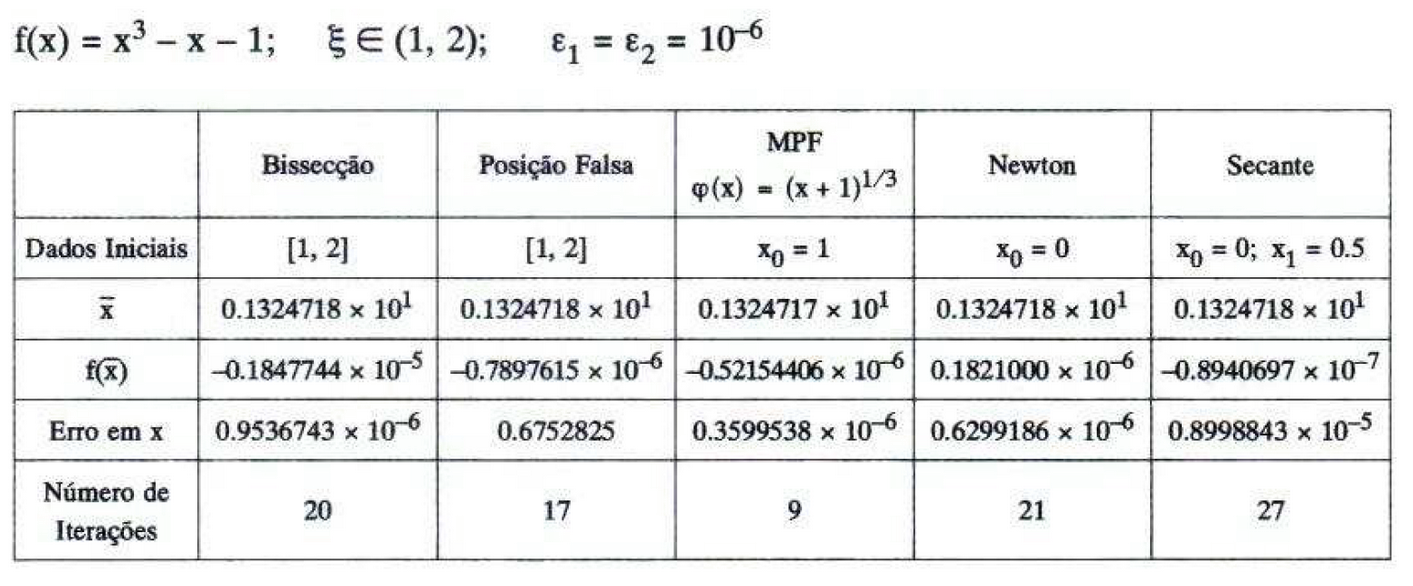

O exemplo 19 apresenta variações significativas na eficiência dos métodos. O Método do Ponto Fixo foi o mais equilibrado e rápido em tempo total, finalizando a tarefa em 23898 ns. Com apenas 9 iterações, ele conseguiu uma convergência muito mais eficiente que os métodos de intervalo tradicionais, mantendo uma complexidade total baixa de 82 pontos.

Os métodos de intervalo, Bisseção e Posição Falsa, mostraram-se mais consistentes entre si, mas com eficiências distintas. A Bisseção completou 20 iterações em 60327 ns, enquanto a Posição Falsa, apesar de realizar menos iterações, com 17, acabou levando mais tempo total, de 68442 ns. Isso ocorre porque a Posição Falsa possui um tempo por iteração significativamente maior (3374.4 ns) em comparação à Bisseção (1980.8 ns), ou seja, para esta função polinomial, o custo computacional de cada passo superou a economia gerada pelo menor número de iterações.

Por outro lado, o método de Newton-Raphson e o da Secante apresentaram um desempenho inferior ao esperado, sendo os mais lentos em tempo total. O Newton-Raphson levou 81622 ns (21 iterações) e a Secante 76227 ns (26 iterações). Este comportamento atípico deve-se à escolha dos pontos iniciais ($x_0 = 0$ para Newton e $x_0 = 0$, $x_1 = 0.5$ para Secante), que estão distantes da raiz real, aproximadamente $1.32471$. Como esses métodos dependem fortemente de uma boa aproximação inicial, começar em uma região onde a inclinação da função não favorece a aproximação rápida resultou em um elevado número de ciclos e na maior complexidade total observada, chegando a 420 pontos na Secante.

In [ ]:
comparar_approx(
    funcao=lambda x: x**3 - x - 1,
    deriv=lambda x: 3*x**2 - 1,
    phi=lambda x: (x + 1)**(1/3),
    intervalo=(1, 2),
    mpf_inicial=1,
    newton_inicial=0,
    secante_inicial=(0, 0.5),
    e=10**-6,
    real=1.3247179572447
)

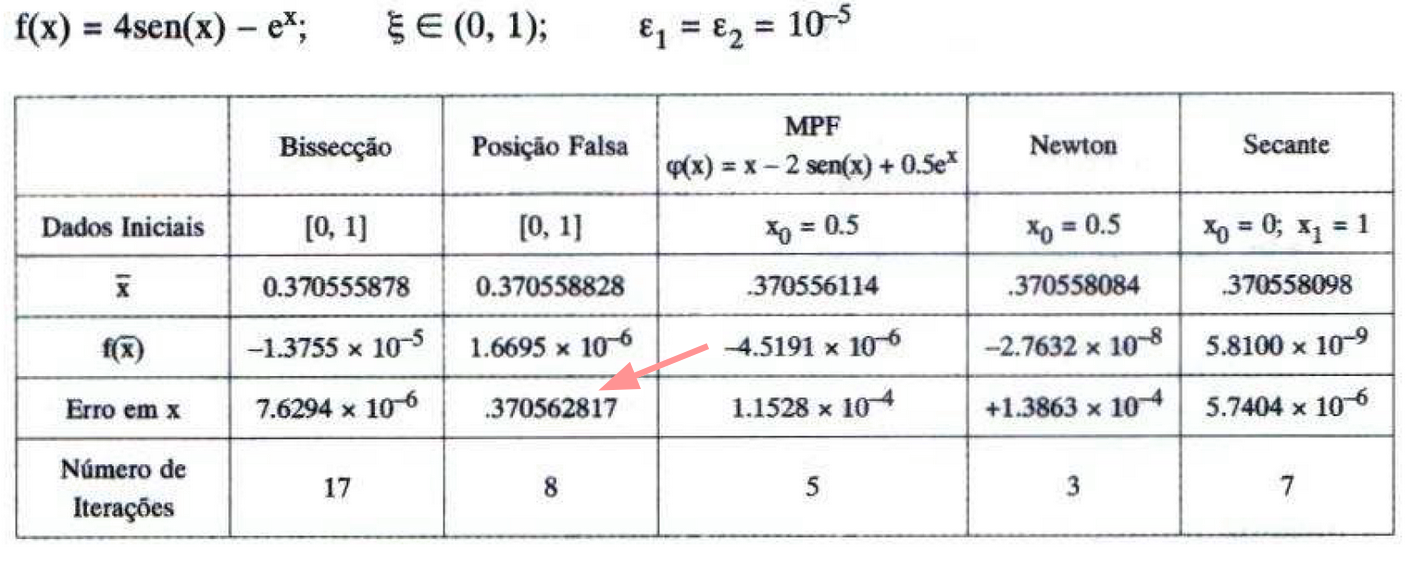

# Exemplo 20

A análise do exemplo 20 volta a demonstrar a superioridade dos métodos abertos quando as aproximações iniciais são favoráveis. O método de Newton-Raphson destacou-se como o mais eficiente de todos, atingindo a convergência em apenas 3 iterações com um tempo total de 12165 ns. Por utilizar informações da derivada e iniciar em $x0=0.5$, ponto próximo à raiz encontrada de aproximadamente 0.3705, ele obteve a menor complexidade total com 32 pontos e um erro extremamente baixo na ordem de $10^{-8}$.

O Método do Ponto Fixo também apresentou excelente desempenho, sendo o segundo mais rápido com um tempo total de 16375 ns. Com apenas 5 iterações e uma complexidade de 46 pontos, ele superou significativamente os métodos de intervalo em termos de agilidade computacional. Da mesma forma, o método da Secante manteve uma performance sólida, completando sua tarefa em 23.569 ns através de 7 iterações, consolidando o grupo de métodos com maior velocidade de convergência para este exemplo.

Em contraste, os métodos de intervalo apresentaram os maiores tempos de execução devido ao maior número de ciclos necessários. A Bisseção foi o método mais lento, exigindo 17 iterações e um tempo total de 57987 ns, além de apresentar a maior complexidade de decisões, totalizando 35. Já a Posição Falsa, embora tenha reduzido o número de iterações para menos da metade, com 8 iterações, em comparação à Bisseção, ainda demandou 36793 ns no total. Isso ocorre porque o custo computacional por iteração da Posição Falsa (3551.6 ns) é quase o dobro do verificado na Bisseção (2092.2 ns), evidenciando que o esforço adicional em cada passo matemático nem sempre compensa a redução na quantidade de iterações quando comparado à simplicidade da Bisseção ou à rapidez do Newton-Raphson.

In [ ]:
comparar_approx(
    funcao=lambda x: 4*math.sin(x) - math.exp(x),
    deriv=lambda x: 4*math.cos(x) - math.exp(x),
    phi=lambda x: x - 2 * math.sin(x) + 0.5 * math.exp(x),
    intervalo=(0, 1),
    mpf_inicial=0.5,
    newton_inicial=0.5,
    secante_inicial=(0, 1),
    e=10**-5,
    real=0.3705583341913
)

# Exemplo 21

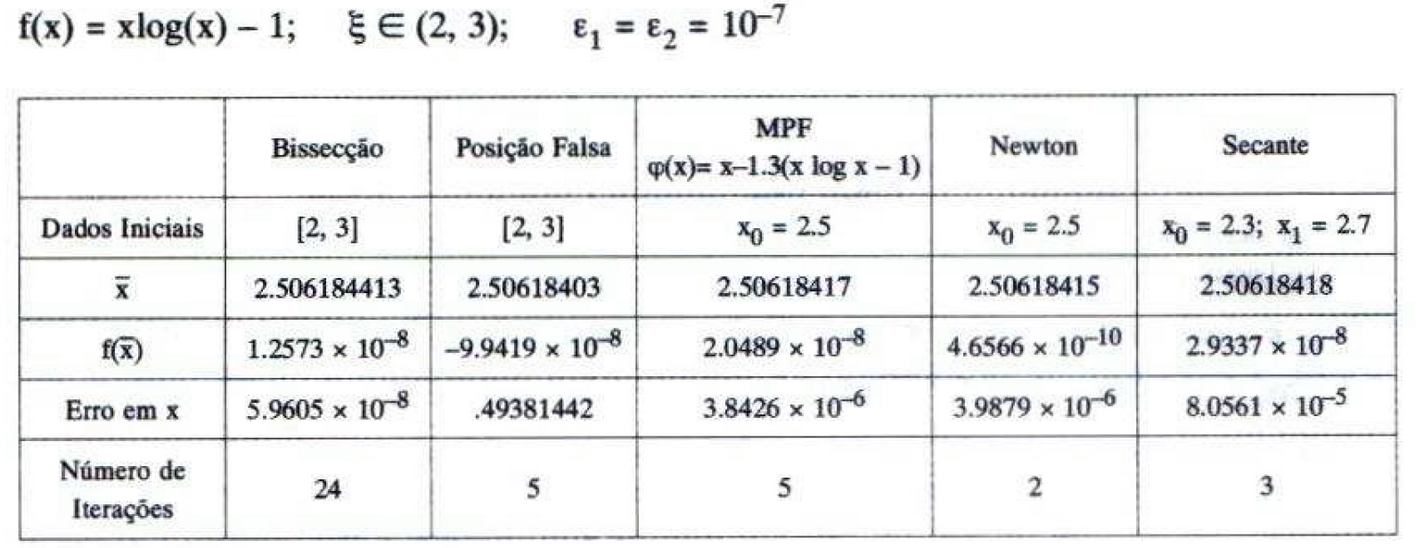

No exemplo 21, o método de Newton-Raphson foi o mais rápido e eficiente, finalizando o processo em apenas $2$ iterações com um tempo total de $18488$ ns. Iniciando em $x_0 = 2.5$, ele alcançou a menor complexidade total do conjunto ($22$ pontos) e entregou a maior precisão, com um erro residual de $f(\bar{x})$ na ordem de $10^{-12}$.

O método da Secante e o Método do Ponto Fixo também apresentaram desempenhos excelentes, terminando em $19608$ ns ($3$ iterações) e $25485$ ns ($5$ iterações), respectivamente. Ambos mantiveram uma complexidade baixa e mostraram-se alternativas muito viáveis ao Newton-Raphson, especialmente em cenários onde o cálculo da derivada analítica pudesse ser mais custoso. Surpreendentemente, o método da Posição Falsa acompanhou de perto esses métodos abertos, convergindo em apenas $5$ iterações. No entanto, seu tempo total de $51505$ ns foi mais que o dobro do tempo da Secante, devido ao seu elevado tempo por iteração ($5626.4$ ns), o maior registrado entre todos os métodos para este exemplo.


Por fim, o método da Bisseção confirmou sua tendência de ser o mais custoso em problemas que exigem alta precisão. Para atingir a tolerância de $10^{-7}$, foram necessárias $24$ iterações, resultando no maior tempo total de execução ($112093$ ns) e na maior complexidade acumulada ($241$ pontos). Este exemplo ilustra claramente que, enquanto a Bisseção garante a convergência, o custo computacional para refinar a raiz em muitas casas decimais cresce linearmente, tornando-a significativamente mais lenta que os métodos que aproveitam a geometria da curva da função.

In [ ]:
comparar_approx(
    funcao=lambda x: x * math.log10(x) - 1,
    deriv=lambda x: math.log10(x) + (1 / math.log(10)),
    phi=lambda x: x - 1.3*(x * math.log10(x) - 1),
    intervalo=(2, 3),
    mpf_inicial=2.5,
    newton_inicial=2.5,
    secante_inicial=(2.3, 2.7),
    e=10**-7,
    real=2.5061841420313
)

# Exemplo 22

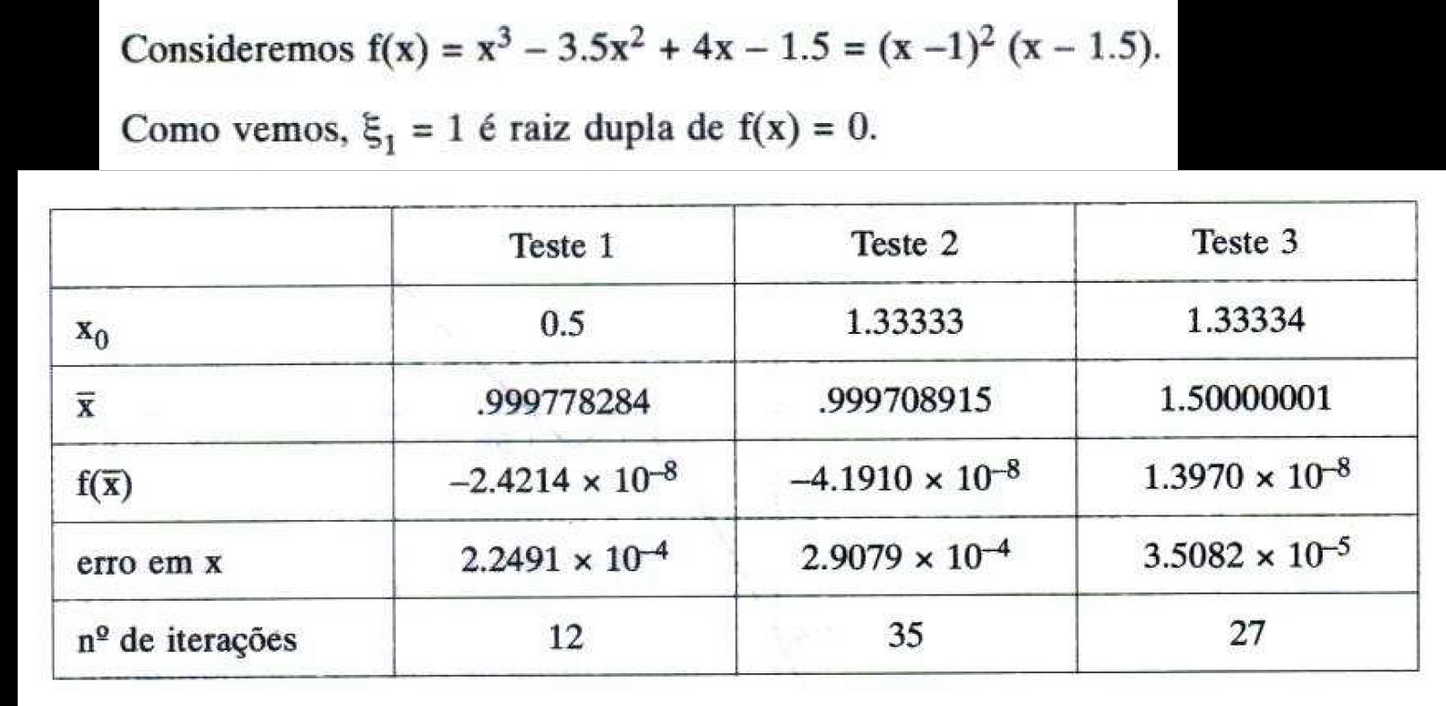

A análise do exemplo 22 demonstra as particularidades do método de Newton-Raphson ao lidar com raízes múltiplas e o impacto da aproximação inicial. Neste exemplo, a função possui uma raiz dupla em $\xi = 1$ e uma raiz simples em $\xi = 1.5$. O comportamento do método variou significativamente entre os três testes realizados com precisão de $10^{-7}$.

O Teste 1 apresentou o desempenho mais eficiente em termos de tempo total, finalizando em $62662$ ns com $11$ iterações. Partindo de $x_0 = 0.5$, o método convergiu para a raiz dupla, aproximadamente $0.9995$, embora com uma velocidade visivelmente reduzida em comparação à convergência quadrática típica do método de Newton para raízes simples. Esta lentidão é característica do comportamento do método em raízes múltiplas, onde a convergência passa a ser linear.


O Teste 2 e o Teste 3 ilustram a extrema sensibilidade do método em relação ao ponto de partida quando este se encontra próximo a um ponto entre raízes. O Teste 2, iniciando em $x_0 = 1.33333$, foi o mais lento de todos, exigindo $35$ iterações e um tempo total de $90675$ ns para convergir novamente para a raiz dupla em $1$. O elevado número de iterações elevou a complexidade total para $352$ pontos, demonstrando o alto custo computacional gerado por uma estimativa inicial desfavorável.

Por fim, o Teste 3 demonstrou como uma variação mínima na entrada inicial ($x_0 = 1.33334$ em vez de $1.33333$) pode alterar completamente o destino da convergência. Neste caso, o método saltou para a raiz simples em $1.5$. Embora tenha convergido com $27$ iterações em $72267$ ns, o erro residual em $f(\bar{x})$ foi o menor entre os testes ($1.2241 \times 10^{-9}$), evidenciando que, uma vez capturado pela região de atração da raiz simples, o método tende a apresentar uma precisão final superior.

In [ ]:
funcao = lambda x: (x - 1)**2 * (x - 1.5)
deriv = lambda x: 3*x**2 - 7*x + 4
e = 10**-7

comparar_testes({
    "Teste 1": (newton_raphson, funcao, deriv, 0.5, e, 1),
    "Teste 2": (newton_raphson, funcao, deriv, 1.33333, e, 1),
    "Teste 3": (newton_raphson, funcao, deriv, 1.33334, e, 1)
})

# Método de Newton para funções polinomiais

Uma das limitações do método de newton é a necessidade de obter e calcular a derivada da função passada. Porém, para o caso especial em que a função é polinomial, podemos calcular o valor da função e sua derivada, de uma vez.

Aplicando esse algoritmo no cálculo do método de newton, temos a seguinte função:

In [ ]:
def newton_raphson_polinomio(x, function, a, e, itmax, real):
    m = Metrics(f"x0 = {x}", function, real)

    # Passo 1: Escolher a aproximação inicial x0, tolerância e, e iterações máximas.
    m.operation()
    deltax = x

    # Passo 2: Iniciar laço iterativo para k = 0 até itmax.
    for k in range(0, itmax):
        m.start_iteration()

        # Cálculo de f(x) e f'(x).
        m.operation(complexity=2)
        b = a[0]
        c = b

        m.avaliation()
        for i in range(1, len(a)-1):
            m.operation(complexity=6)
            b = a[i] + b * x
            c = b + c * x

        m.operation(complexity=3)
        b = a[-1] + b * x

        # Passo 2.1: Se |f(x)| <= e, então x_barra = x. FIM.
        m.decision(complexity=2)
        if abs(b) <= e:
            return m.report(x)

        # Passo 2.2: Atualizar x_novo = x - f(x) / f'(x).
        m.operation(complexity=4)
        deltax = b / c
        x = x - deltax

        # Passo 2.3: Se |x_novo - x_antigo| <= e, então x_barra = x. FIM.
        m.decision(complexity=2)
        if abs(deltax) <= e:
            return m.report(x)

    m.stop_iteration()

    # Passo 3: Notificar caso o número máximo de iterações seja atingido sem convergência.
    m.operation()
    print('Número máximo de iterações excedido')

    # Passo 4: Retornar resultado nulo ou inconclusivo.
    return m.report(None)

# Aplicando as modificações no método de Ponto Fixo e da Secante

Podemos utilizar uma versão mais simplificada do algoritmo, que apenas avalia a função, para ser utilizado no método do ponto fixo e da secante.

In [ ]:
def f_polinomio(x, a):
  b = a[0]

  for i in range(1, len(a)-1):
      b = a[i] + b * x

  b = a[-1] + b * x
  return b

In [ ]:
def ponto_fixo_polinomio(x, funcao, phi, a, phi_a, e, itmax, real):
    m = Metrics(f'x0 = {x}', funcao, real)

    # Passo 1: Escolher a aproximação inicial x0 e a precisão e.
    m.operation()
    x0 = x

    # Passo 2: Se |f(x0)| < e, então x_barra = x0. FIM.
    m.decision(complexity=2)
    m.avaliation()
    if abs(f_polinomio(x0, a)) < e:
        return m.report(x0)

    # Passo 3: k = 1
    m.operation()
    k = 1

    for k in range(itmax):
        m.start_iteration()

        # Passo 4: x1 = phi(x0)
        m.avaliation()
        x1 = f_polinomio(x0, phi_a)

        # Passo 5: Se |f(x1)| < e ou |x1 - x0| < e, então x_barra = x1. FIM.
        m.decision(complexity=6)
        m.avaliation()
        if abs(f_polinomio(x1, a)) < e or abs(x1 - x0) < e:
            return m.report(x1)

        # Passo 6: x0 = x1
        m.operation()
        x0 = x1

        # O laço for incrementa k automaticamente e retorna ao Passo 4.

    return m.report(None)

In [ ]:
def secante_polinomio(x0, x1, funcao, a, e, itmax, real):
    m = Metrics(f'x0 = {x0}, x1 = {x1}', funcao, real)

    # Passo 1: Dados iniciais (x0, x1 e precisões).
    # (Parâmetros de entrada e objeto Metrics)

    # Passo 2: Se |f(x0)| < e1, faça x_barra = x0. FIM.
    m.decision(complexity=2)
    m.avaliation()
    if abs(f_polinomio(x0, a)) < e:
        return m.report(x0)

    # Passo 3: Se |f(x1)| < e1 ou se |x1 - x0| < e2, faça x_barra = x1. FIM.
    m.decision(complexity=5)
    m.avaliation()
    if abs(f_polinomio(x1, a)) < e or abs(x1 - x0) < e:
        return m.report(x1)

    # Passo 4: k = 1
    m.operation()

    for k in range(itmax):
        m.start_iteration()

        # Passo 5: x2 = x1 - [f(x1) / (f(x1) - f(x0))] * (x1 - x0)
        m.avaliation(quantity=3, complexity=6)
        f_x1 = f_polinomio(x1, a)
        f_x0 = f_polinomio(x0, a)
        x2 = x1 - (f_x1 / (f_x1 - f_x0)) * (x1 - x0)

        # Passo 6: Se |f(x2)| < e1 ou se |x2 - x1| < e2, então faça x_barra = x2. FIM.
        m.decision(complexity=6)
        m.avaliation()
        if abs(f_polinomio(x2, a)) < e or abs(x2 - x1) < e:
            return m.report(x2)

        # Passo 7: x0 = x1 e x1 = x2
        m.operation(complexity=2)
        x0 = x1
        x1 = x2

        # Passo 8: k = k + 1. Volte ao passo 5.

# Exemplo 1

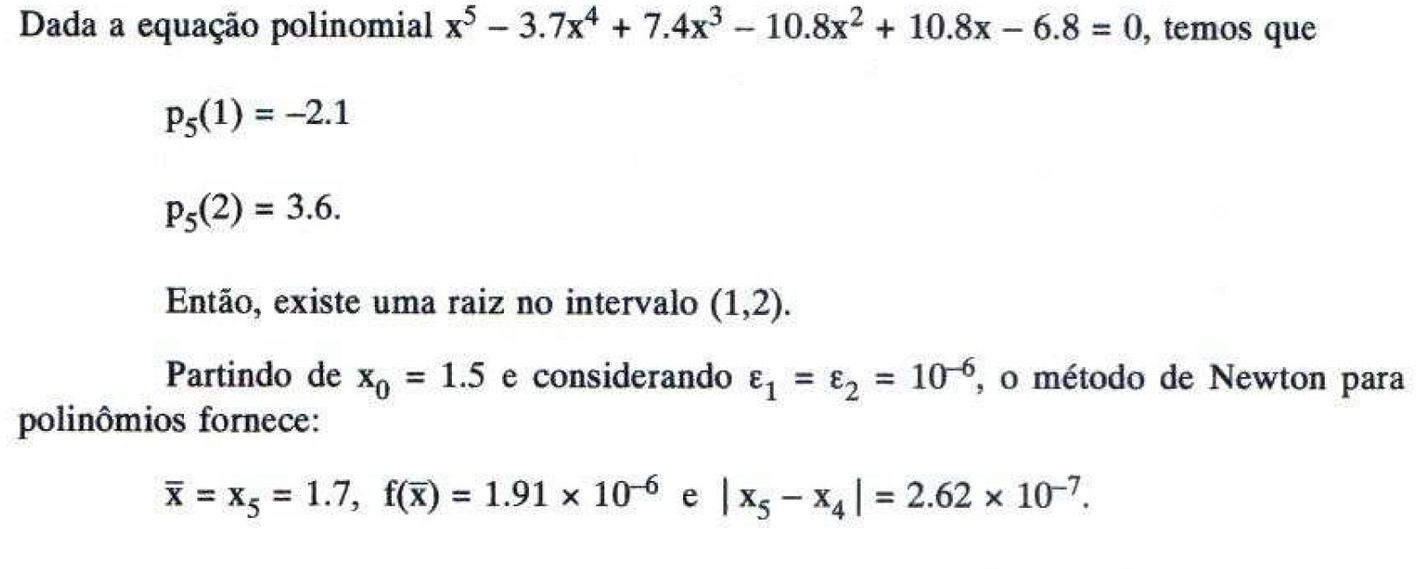

Para o exemplo 1, partindo de $x_0 = 1.5$ com precisão de $10^{-6}$, o método da **Secante** apresentou o melhor desempenho temporal, finalizando a tarefa em $34561$ ns. Embora tenha realizado $6$ iterações, uma a mais que o método de Newton, sua menor complexidade por operação resultou em um tempo total inferior.

O método de Newton-Raphson para polinômios, otimizado pelo uso do algoritmo de Horner para o cálculo simultâneo da função e sua derivada, convergiu em apenas $5$ iterações. No entanto, ele registrou o maior tempo médio por iteração ($6641.2$ ns) e a maior complexidade total ($180$ pontos) entre os métodos comparados. Isso ocorre porque, embora o número de passos seja reduzido, a carga computacional de avaliar a estrutura polinomial complexa e sua derivada em cada ciclo é significativamente mais alta.


Já o Método do Ponto Fixo revelou-se o menos eficiente para esta classe de função, exigindo o maior número de iterações ($13$) e o maior tempo total de execução ($67406$ ns). Mesmo possuindo a menor complexidade por iteração ($6.9$ pontos), a lenta taxa de convergência linear do MPF em polinômios de alto grau acaba gerando um esforço acumulado superior.

In [ ]:
funcao = lambda x: x**5 - 3.7 * x**4 + 7.4 * x**3 - 10.8 * x**2 + 10.8 * x - 6.8
phi = lambda x: (-x**5 + 3.7 * x**4 - 7.4 * x**3 + 10.8 * x**2 + 6.8) / 10.8
a = [1, -3.7, 7.4, -10.8, 10.8, -6.8]
phi_a = [-1/10.8, 3.7/10.8, -7.4/10.8, 1, 0, 6.8/10.8]
e = 10**-6
real = 1.7

comparar_testes({
    "MPF": (ponto_fixo_polinomio, 1.5, funcao, phi, a, phi_a, e, 100, real),
    "Newton": (newton_raphson_polinomio, 1.5, funcao, a, e, 100, real),
    "Secante": (secante_polinomio, 1.5, 2, funcao, a, e, 100, real)
})

# Exemplo 2

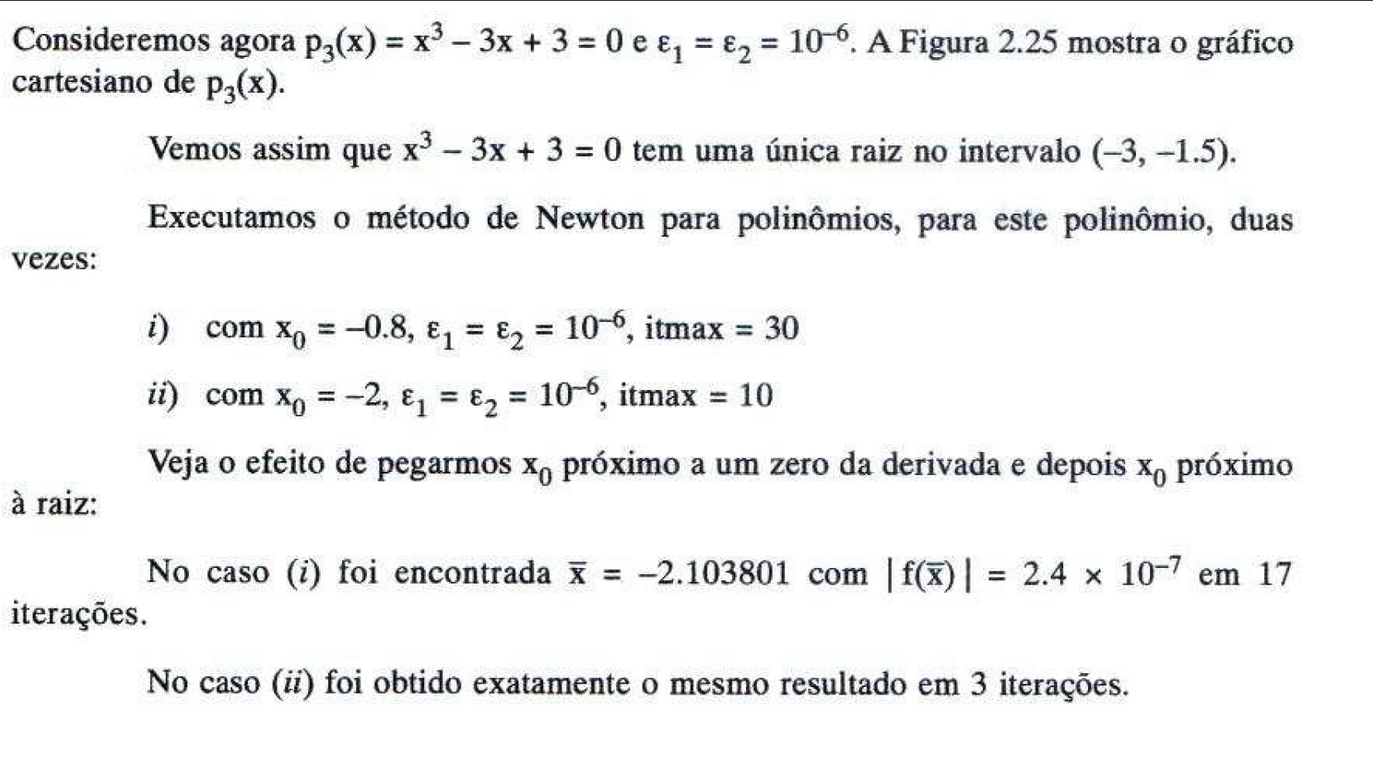

O exemplo 2 destaca a importância da escolha da aproximação inicial ($x_{0}$) para a eficiência dos métodos. Como demonstrado nos testes realizados, a proximidade do valor inicial em relação à raiz ou a pontos críticos, como zeros da derivada, altera o tempo de execução e o número de iterações.

O método de Newton-Raphson para polinômios ilustrou essa sensibilidade. No Newton 2, iniciando com $x_{0} = -2$, mais próximo da raiz, o algoritmo foi extremamente eficiente, finalizando em apenas $4$ iterações com um tempo total de $23054$ ns. Em contrapartida, o Newton 1, iniciando em $x_{0} = -0.8$,
próximo a um zero da derivada, exigiu $18$ iterações e um tempo significativamente maior de $95125$ ns. Essa disparidade ocorre porque, perto de pontos onde a derivada é nula, as retas tangentes tendem a ser horizontais, "afastando" a aproximação da raiz real.


Os métodos da Secante e do Ponto Fixo seguiram tendências similares de dependência dos dados iniciais. A Secante 1 ($x_{0} = -0.8, x_{1} = -1.5$) convergiu em $9$ iterações ($54347$ ns), enquanto a Secante 2, com pontos mais próximos da raiz, reduziu esse número para $5$ iterações ($58954$ ns), apresentando uma complexidade total menor. Já o MPF revelou-se o método mais lento e propenso a falhas: no MPF 1, o algoritmo atingiu o limite de $30$ iterações sem convergir adequadamente, registrando o maior tempo total de $136.206$ ns e a maior carga de decisões ($31$).

In [ ]:
funcao = lambda x: x**3 - 3*x + 3
phi = lambda x: x**3/3 + 1
a = [1, 0, -3, 3]
phi_a = [1/3, 0, 0, 1]
e = 10**-6
real = -2.1038034027355

comparar_testes({
    "MPF 1": (ponto_fixo_polinomio, -0.8, funcao, phi, a, phi_a, e, 30, real),
    "MPF 2": (ponto_fixo_polinomio, -2, funcao, phi, a, phi_a, e, 10, real),
    "Newton 1": (newton_raphson_polinomio, -0.8, funcao, a, e, 30, real),
    "Newton 2": (newton_raphson_polinomio, -2, funcao, a, e, 10, real),
    "Secante 1": (secante_polinomio, -0.8, -1.5, funcao, a, e, 30, real),
    "Secante 2": (secante_polinomio, -3, -2, funcao, a, e, 10, real)
})